In [2]:
using MLDatasets

# load full training set
train_x, train_y = MNIST.traindata()

# load full test set
test_x,  test_y  = MNIST.testdata()

([0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8;;; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8;;; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8;;; … ;;; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8;;; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8;;; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8], [7, 2, 1, 0, 4, 1, 4, 9, 5, 9  …  7, 8, 9, 0, 1, 2, 3, 4, 5, 6])

In [3]:
using Plots, Images, TestImages

┌ Info: Precompiling TestImages [5e47fb64-e119-507b-a336-dd2b206d9990]
└ @ Base loading.jl:1423


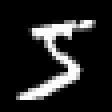

┌ Info: Precompiling ImageIO [82e4d734-157c-48bb-816b-45c225c6df19]
└ @ Base loading.jl:1423
┌ Info: Precompiling PNGFiles [f57f5aa1-a3ce-4bc8-8ab9-96f992907883]
└ @ Base loading.jl:1423


In [4]:
# Fun ways to visualize images
function show_training_img(i)
    colorview(Gray, train_x[:,:,i]')
end

function show_test_img(i)
    colorview(Gray, test_x[:,:,i]')
end

show_training_img(1)

In [5]:
size(train_x)

(28, 28, 60000)

In [8]:
using Flux

(m, n, z) = size(train_x)

# Reshape Data in order to flatten each image into a linear array
xtrain = Flux.flatten(train_x)
xtest = Flux.flatten(test_x)

# One-hot-encode the labels
ytrain, ytest = Flux.onehotbatch(train_y, 0:9), Flux.onehotbatch(test_y, 0:9)


model = Flux.Chain(
                    Dense(m*n, 60, Flux.σ),
                    Dense(60, 60, Flux.σ),
                    Dense(60, 10, Flux.σ),
                )

model(xtrain)

10×60000 Matrix{Float32}:
 0.246764  0.24414   0.239361  0.239084  …  0.245873  0.244541  0.238308
 0.354057  0.350043  0.354517  0.341852     0.347877  0.341535  0.344799
 0.421725  0.408902  0.428095  0.430925     0.4184    0.406566  0.431694
 0.305845  0.301228  0.311605  0.304909     0.301005  0.300307  0.29943
 0.566063  0.571797  0.573537  0.572485     0.565864  0.569203  0.576328
 0.58762   0.584453  0.575922  0.577826  …  0.587433  0.579778  0.577148
 0.419297  0.4088    0.421232  0.4153       0.421128  0.41145   0.417121
 0.55405   0.557729  0.573941  0.552796     0.551008  0.579973  0.553102
 0.741376  0.745941  0.735508  0.731213     0.733284  0.745487  0.731334
 0.519489  0.515295  0.524677  0.514039     0.510887  0.514329  0.516028

In [9]:
# Define mean squared error loss function
loss(x, y) = Flux.Losses.mse(model(x), y)

loss(xtrain, ytrain)

0.24751282f0

In [10]:
# Define gradient descent optimizer
opt = Flux.Descent()

# Format your data
data = [(xtrain, ytrain)]

# Collect weights and bias for your model
parameters = Flux.params(model)

# Train the model over one epoch
Flux.train!(loss, parameters, data, opt)

loss(xtrain, ytrain)

0.24099547f0

In [51]:
# Train the model over 100 epochs
for epoch in 1:10
    Flux.train!(loss, parameters, data, opt)
end

loss(xtrain, ytrain)

0.09393418f0

In [46]:
i = rand(1:10)

predict(x) = argmax(model(x))

digit = predict(xtest[:, i])
println("Predict digit: $(digit)")


LoadError: BoundsError: attempt to access 784×10000 reshape(reinterpret(N0f8, ::Array{UInt8, 3}), 784, 10000) with eltype N0f8 at index [1:784, 2361837]

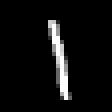

In [49]:
show_test_img(32)

In [50]:
argmax(model(xtest[:, 33]))

9

In [22]:
size(xtrain[:, 1])

(784,)

In [43]:
ytest

10×10000 OneHotMatrix(::Vector{UInt32}) with eltype Bool:
 ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  …  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  1  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  1  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  …  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅     ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1
 1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  1  ⋅  ⋅  1     ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅

In [53]:
using Statistics
using Flux: onehotbatch, onecold, crossentropy, throttle
using Base.Iterators: repeated

In [54]:
imgs = Flux.Data.MNIST.images()
labels = Flux.Data.MNIST.labels();

┌ Warning: Flux's datasets are deprecated, please use the package MLDatasets.jl
└ @ Flux.Data /Users/randyrdavila/.julia/packages/Flux/qAdFM/src/data/Data.jl:16
┌ Warning: Flux's datasets are deprecated, please use the package MLDatasets.jl
└ @ Flux.Data /Users/randyrdavila/.julia/packages/Flux/qAdFM/src/data/Data.jl:16


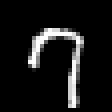

In [55]:
imgs[27454]

In [56]:
## Boring Preprocessing
X = hcat(float.(reshape.(imgs, :))...) #stack all the images
Y = onehotbatch(labels, 0:9)

10×60000 OneHotMatrix(::Vector{UInt32}) with eltype Bool:
 ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  …  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  1  ⋅  ⋅  1  ⋅  1  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  1  ⋅  1     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅
 ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  …  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  1  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  1
 ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  1  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅

In [57]:
# Our model, just like before, chaining dense layers
# Go from 28^2 dimensional space (images are 28x28) to 10 dimensional space (labels are 0-9)

m = Chain(
  Dense(28^2, 32, relu),
  Dense(32, 10),
  softmax)

Chain(
  Dense(784, 32, relu),                 # 25_120 parameters
  Dense(32, 10),                        # 330 parameters
  NNlib.softmax,
)                   # Total: 4 arrays, 25_450 parameters, 99.664 KiB.

In [58]:
loss(x, y) = crossentropy(m(x), y) 
opt = ADAM(); # popular stochastic gradient descent variant

accuracy(x, y) = mean(onecold(m(x)) .== onecold(y)) # cute way to find average of correct guesses

dataset = repeated((X,Y),100) # repeat the data set 200 times, as opposed to @epochs 200 ...
evalcb = () -> @show(loss(X, Y))

#1 (generic function with 1 method)

In [59]:
Flux.train!(loss, params(m), dataset, opt, cb = throttle(evalcb, 10));

LoadError: InterruptException:

┌ Warning: Flux's datasets are deprecated, please use the package MLDatasets.jl
└ @ Flux.Data /Users/randyrdavila/.julia/packages/Flux/qAdFM/src/data/Data.jl:16


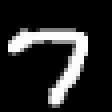

In [63]:
Flux.Data.MNIST.images(:test)[5288] # give me a number 1-10000

In [64]:
# Same preprocessing
test_X = hcat(float.(reshape.(Flux.Data.MNIST.images(:test), :))...)
test_Y = onehotbatch(Flux.Data.MNIST.labels(:test), 0:9);

m(test_X[:,5288])

┌ Warning: Flux's datasets are deprecated, please use the package MLDatasets.jl
└ @ Flux.Data /Users/randyrdavila/.julia/packages/Flux/qAdFM/src/data/Data.jl:16
┌ Warning: Flux's datasets are deprecated, please use the package MLDatasets.jl
└ @ Flux.Data /Users/randyrdavila/.julia/packages/Flux/qAdFM/src/data/Data.jl:16


In [65]:
#decode
onecold(m(test_X[:,5288])) - 1 

5

In [66]:
# Training set accuracy
accuracy(X, Y)

0.18798333333333334